In [1]:
import numpy as np
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
from scipy import stats 
from PIL import*
import seaborn as sns


In [2]:
df = pd.read_json('../data/aggregated.json')


In [3]:
df.columns

Index(['address', 'price', 'bed', 'bath', 'area', 'company', 'neighborhood',
       'laundry', 'pets', 'parking', 'utilities', 'property_type',
       'year_built', 'description', 'images'],
      dtype='object')

In [4]:
df.head(30)

address   price   bed  bath  \
0                                3050 Birch Hollow Dr  1095.0     2   1.0   
1                                        912 Rose Ave  2000.0     4   2.5   
2                                                None   695.0     3   2.0   
3                1505 Natalie Lane near Kipling Drive  1385.0     1   1.0   
4                1505 Natalie Lane near Kipling Drive  1185.0     1   1.0   
5                                                None   580.0  None   NaN   
6                1505 Natalie Lane near Kipling Drive  1375.0     1   1.0   
7           310 E. Liberty St. Apt #2 near S. 5th Ave  1235.0     1   1.0   
8                             10910 Independence Lane   952.0     2   1.0   
9                                3050 Birch Hollow Dr  1095.0     2   1.0   
10                                               None   950.0     1   1.0   
11                       2167 Medford near Manchester  1150.0     2   1.0   
12  101 Lake Village near South Main Street/Ann Ar...  1560.0  None   NaN   
13                                               None  1200.0     1   1.0   
14  101 Lake Village near South Main Street/Ann Ar...  1304.0  None   NaN   
15                            10910 Independence Lane   859.0     1   1.0   
16                      4873 packard st near Golfside   955.0     1   1.0   
17                    214 South Hewitt near Ellsworth   880.0     1   1.0   
18                            10910 Independence Lane   775.0     1   1.0   
19                            10910 Independence Lane   790.0     2   1.0   
20                                     275 Harbor Way  1399.0     1   1.0   
21                                               None   749.0     1   1.5   
22                               Pauline near Stadium  1149.0     1   1.0   
23                    214 South Hewitt near Ellsworth   970.0     2   1.0   
24                                               None  1306.0     2   2.0   
25                                     406 Montgomery  1290.0     2   1.0   
26                    1610 Longshore Dr. near Amherst  1475.0     0   1.0   
27                                     406 Montgomery  1290.0     2   1.0   
28                                       Pauline Blvd   562.0     4   2.0   
29                               3050 Birch Hollow Dr  1095.0     2   1.0   

    area company neighborhood  laundry  pets  parking utilities property_type  \
0    876    None         None      1.0   1.0      1.0        []     apartment   
1   2000    None         None      1.0   1.0      1.0        []         house   
2      0    None         None      1.0   0.0      1.0        []     apartment   
3    800    None         None      1.0   1.0      1.0        []     apartment   
4    800    None         None      1.0   1.0      1.0        []     apartment   
5      0    None         None      1.0   0.0      0.0        []     apartment   
6    800    None         None      1.0   1.0      0.0        []     apartment   
7      0    None         None      1.0   1.0      0.0        []     apartment   
8   1000    None         None      1.0   0.0      0.0        []     apartment   
9    876    None         None      1.0   1.0      1.0        []     apartment   
10   550    None         None      1.0   1.0      1.0        []     apartment   
11  1000    None         None      1.0   1.0      1.0        []     apartment   
12   900    None         None      1.0   1.0      0.0        []     apartment   
13     0    None         None      1.0   0.0      1.0        []     apartment   
14  1150    None         None      1.0   1.0      0.0        []     apartment   
15   850    None         None      1.0   0.0      0.0        []     apartment   
16   750    None         None      1.0   1.0      1.0        []     apartment   
17   660    None         None      1.0   1.0      1.0        []     apartment   
18   850    None         None      1.0   0.0      0.0        []     apartment   
19  1000    None         None      1.0

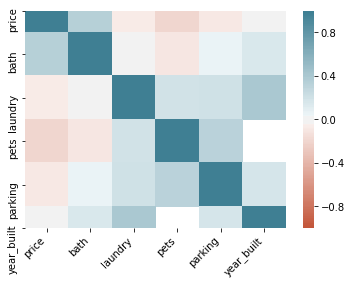

In [5]:
corr = df.corr()
ax = sns.heatmap(
    corr, 

    vmin=-1, vmax=1, center=0,

    cmap=sns.diverging_palette(20, 220, n=200),

    square=True)

ax.set_xticklabels(

    ax.get_xticklabels(),

    rotation=45,

    horizontalalignment='right'

);

In [6]:
def fixer(address):
    if address != None:
        address = address.lower()
        neary = address.find("near")
        if neary != -1:
            address =address[0:neary-1]
        return address
        

In [7]:
def cleaner(address):
    if address == None:
        return False
    stringy = address[0:1]
    if stringy.isdigit() == False:
        return False
    return True


In [8]:
df['address'] = df['address'].apply(fixer)
df.head()

address   price bed  bath  area company neighborhood  laundry  \
0  3050 birch hollow dr  1095.0   2   1.0   876    None         None      1.0   
1          912 rose ave  2000.0   4   2.5  2000    None         None      1.0   
2                  None   695.0   3   2.0     0    None         None      1.0   
3     1505 natalie lane  1385.0   1   1.0   800    None         None      1.0   
4     1505 natalie lane  1185.0   1   1.0   800    None         None      1.0   

   pets  parking utilities property_type  year_built  \
0   1.0      1.0        []     apartment         NaN   
1   1.0      1.0        []         house         NaN   
2   0.0      1.0        []     apartment         NaN   
3   1.0      1.0        []     apartment         NaN   
4   1.0      1.0        []     apartment         NaN   

                                         description  \
0  This bedroom apartments includes:\n\n→ Contemp...   
1  Stunning Ann Arbor home, perfect family house ...   
2  AWESOME Affordable. This stunning 3 bedroom, 1...   
3  Have you heard about our Stars & Stripes progr...   
4  Have you heard about our Stars & Stripes progr...   

                                              images  
0  [https://images.craigslist.org/00S0S_8ZkasrSZ6...  
1  [https://images.craigslist.org/00Y0Y_4tey2xf24...  
2                                                 []  
3  [https://images.craigslist.org/00p0p_1PnkFaSsW...  
4  [https://images.craigslist.org/00k0k_7n7PgfXF5...

In [9]:
def ann_arbor(address):
    if address != None:
        if str(address).find("ann arbor") == -1:
            address = address + " ann arbor"
        return address
df['address'] = df['address'].apply(ann_arbor)
df.head(40)

address   price   bed  bath  area company  \
0        3050 birch hollow dr ann arbor  1095.0     2   1.0   876    None   
1                912 rose ave ann arbor  2000.0     4   2.5  2000    None   
2                                  None   695.0     3   2.0     0    None   
3           1505 natalie lane ann arbor  1385.0     1   1.0   800    None   
4           1505 natalie lane ann arbor  1185.0     1   1.0   800    None   
5                                  None   580.0  None   NaN     0    None   
6           1505 natalie lane ann arbor  1375.0     1   1.0   800    None   
7   310 e. liberty st. apt #2 ann arbor  1235.0     1   1.0     0    None   
8     10910 independence lane ann arbor   952.0     2   1.0  1000    None   
9        3050 birch hollow dr ann arbor  1095.0     2   1.0   876    None   
10                                 None   950.0     1   1.0   550    None   
11               2167 medford ann arbor  1150.0     2   1.0  1000    None   
12           101 lake village ann arbor  1560.0  None   NaN   900    None   
13                                 None  1200.0     1   1.0     0    None   
14           101 lake village ann arbor  1304.0  None   NaN  1150    None   
15    10910 independence lane ann arbor   859.0     1   1.0   850    None   
16            4873 packard st ann arbor   955.0     1   1.0   750    None   
17           214 south hewitt ann arbor   880.0     1   1.0   660    None   
18    10910 independence lane ann arbor   775.0     1   1.0   850    None   
19    10910 independence lane ann arbor   790.0     2   1.0  1000    None   
20             275 harbor way ann arbor  1399.0     1   1.0   734    None   
21                                 None   749.0     1   1.5     0    None   
22                    pauline ann arbor  1149.0     1   1.0   822    None   
23           214 south hewitt ann arbor   970.0     2   1.0   825    None   
24                                 None  1306.0     2   2.0   943    None   
25             406 montgomery ann arbor  1290.0     2   1.0   760    None   
26         1610 longshore dr. ann arbor  1475.0     0   1.0   825    None   
27             406 montgomery ann arbor  1290.0     2   1.0   760    None   
28               pauline blvd ann arbor   562.0     4   2.0  2054    None   
29       3050 birch hollow dr ann arbor  1095.0     2   1.0   876    None   
30           214 south hewitt ann arbor  1000.0     2   1.0   825    None   
31           214 south hewitt ann arbor   970.0     2   1.0   825    None   
32           214 south hewitt ann arbor   880.0     1   1.0   660    None   
33           214 south hewitt ann arbor  1020.0     2   1.0   825    None   
34           214 south hewitt ann arbor   860.0     1   1.0   660    None   
35                                 None   900.0     2   1.0     0    None   
36                                 None   900.0     2   1.0     0    None   
37                                 None   660.0     2   2.0     0    None   
38     3089 woodland hills dr ann arbor  1249.0     3   1.5  1000    None   
39                    pauline ann arbor  1149.0     1   1.0   822    None   

   neighborhood  laundry  pets  parking utilities property_type  year_built  \
0          None      1.0   1.0      1.0        []     apartment         NaN   
1          None      1.0   1.0      1.0        []         house         NaN   
2          None      1.0   0.0      1.0        []     apartment         NaN   
3          None      1.0   1.0      1.0        []     apartment         NaN   
4          None      1.0   1.0      1.0        []     apartment         NaN   
5          None      1.0   0.0      0.0        []     apartment         NaN   
6          None      1.0   1.0      0.0        []     apartment         NaN   
7          None      1.0   1.0      0.0        []     apartment         NaN   
8          None      1.0   0.0      0.0        []     apartment         NaN   
9          None      1.0   1.0      1.0        []     apartment         NaN   
10   

In [10]:
cleaner_df = df[df['address'].apply(cleaner)]
cleaner_df.columns
real_df = cleaner_df[['address','price']]
real_df.head(40)

address   price
0         3050 birch hollow dr ann arbor  1095.0
1                 912 rose ave ann arbor  2000.0
3            1505 natalie lane ann arbor  1385.0
4            1505 natalie lane ann arbor  1185.0
6            1505 natalie lane ann arbor  1375.0
7    310 e. liberty st. apt #2 ann arbor  1235.0
8      10910 independence lane ann arbor   952.0
9         3050 birch hollow dr ann arbor  1095.0
11                2167 medford ann arbor  1150.0
12            101 lake village ann arbor  1560.0
14            101 lake village ann arbor  1304.0
15     10910 independence lane ann arbor   859.0
16             4873 packard st ann arbor   955.0
17            214 south hewitt ann arbor   880.0
18     10910 independence lane ann arbor   775.0
19     10910 independence lane ann arbor   790.0
20              275 harbor way ann arbor  1399.0
23            214 south hewitt ann arbor   970.0
25              406 montgomery ann arbor  1290.0
26          1610 longshore dr. ann arbor  1475.0
27              406 montgomery ann arbor  1290.0
29        3050 birch hollow dr ann arbor  1095.0
30            214 south hewitt ann arbor  1000.0
31            214 south hewitt ann arbor   970.0
32            214 south hewitt ann arbor   880.0
33            214 south hewitt ann arbor  1020.0
34            214 south hewitt ann arbor   860.0
38      3089 woodland hills dr ann arbor  1249.0
40          2973 west clark rd ann arbor  1374.0
44  1645 n maple rd # 309, ann arbor, mi   750.0
45         2224 golfside drive ann arbor   989.0
46  1645 n maple rd # 309, ann arbor, mi   750.0
47  1645 n maple rd # 309, ann arbor, mi   750.0
50     3008 randolph court dr. ann arbor   933.0
52      3089 woodland hills dr ann arbor   939.0
59            8777 rushside dr ann arbor  1420.0
65               1116 s forest ann arbor  6000.0
79          2201 glencoe hills ann arbor  1529.0
80          2201 glencoe hills ann arbor  2179.0
81          2201 glencoe hills ann arbor  1149.0

In [11]:
real_df.to_csv("CLEAN_DATA_.csv",header=True)